# TPC1 - Teoria de Probabilidades

*  Não deve escrever o seu nome nem nenhum código identificador em nenhum
sítio.
* Deve entregar ESTE Notebook de Jupyter.
* O trabalho é individual. Podem e devem haver discussões com colegas
mas o resultado entregue é individual.
* Não deve acrescentar ou apagar nenhuma célula.
* Todas as explicações devem ser claras e concisas.
* É preferível fazer menos e fazer bem que muito e mal.
* A não verificação de alguma destas regras leva ao anulamento e exclusão
da prova.

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
%matplotlib inline

## Pergunta 1
**Gerador de números aleatórios:** Considere a distribuição log-logística
cuja densidade de probabilidade é dada por,
\begin{equation}
\rho(x)=\frac{\beta}{\alpha}\frac{(x/\alpha)^{\beta-1}}{\left(1+(x/\alpha)^{\beta}\right)^{2}}
\end{equation}
onde $x$ é uma variável aleatória real com suporte em $\mathbb{R}_{0}^{+}$.
O exponente $\beta$ limita o número de momentos finitos associados
a esta distribuição.

1. Mostre que a distribuição de probabilidade cumulativa é dada por
\begin{equation}
C(x)=\frac{1}{1+\left(\frac{x}{\alpha}\right)^{-\beta}}
\end{equation}

Integrando $\rho(x)$:

$\begin{align}
&\int{\frac{β}{α}\frac{(\frac{x}{α})^{β-1}}{(1+(\frac{x}{α})^β)^2}dx} = {\frac{β}{α}\int\frac{(\frac{x}{α})^{β-1}}{(1+(\frac{x}{α})^β)^2}dx=}&
\end{align}$

$\begin{align}
\\
\frac{x}{α}=y ⇒ dx=αdy
\end{align}$

$\begin{align}
\\
=\int β\frac{y^{β-1}}{(1+y^β)^2}dy =
\end{align}$

$\begin{align}
\\
u=y^β ⇒ du=βy^{β-1}dy ⇒ dy=\frac{du}{βy^{β-1}}
\end{align}$

$\begin{align}
\\
&\int \frac{du}{(1+u)^2} = - \frac{1}{1+u} = -\frac{1}{1+(\frac{x}{α})^β}&
\\
\\
\end{align}$

Como queremos o integral de 0 a x usamos o resultado:

$\begin{align}
\\
&-\frac{1}{1+(\frac{x'}{α})^β)}\Big|_0^x = \frac{1}{1+\left(\frac{x}{\alpha}\right)^{-\beta}}
\end{align}$

2. Implemente o método de inversão e gere amostras para $\alpha=1$ e $\beta=\{1,1.6,2.1\}$. Compare os histogramas com a densidade de probabilidade exacta.

Temos que inverter a função $C(x)$ para obter os valores de $x$. A função C(x) está entre 0 e 1, portanto, tiramos um número aleatório $r$ duma distribuição uniforme. Para cada $r$ obtemos $x$ tal que $C(x)=r$.

usamos: $x=C(r)^{-1}$

$\begin{align}
r(1+(\frac{x}{\alpha})^{-\beta}) = 1 \Leftrightarrow x = α(\frac{1}{r} - 1)^ {-\frac{1}{\beta}} \Leftrightarrow C(r)^{-1} = α(\frac{1}{r} - 1)^ {-\frac{1}{\beta}}
\end{align}$

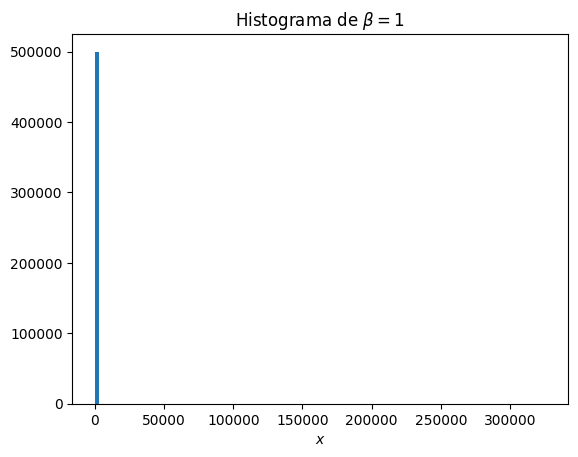

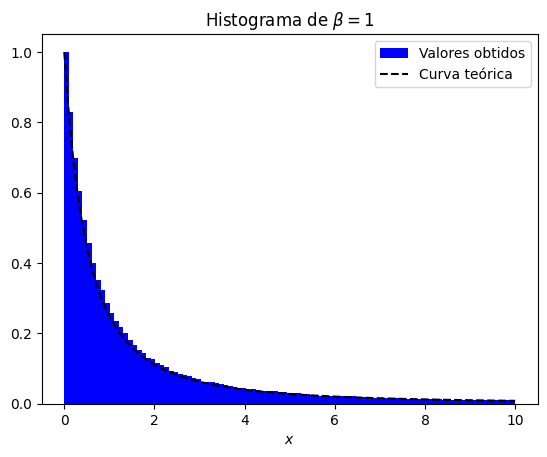

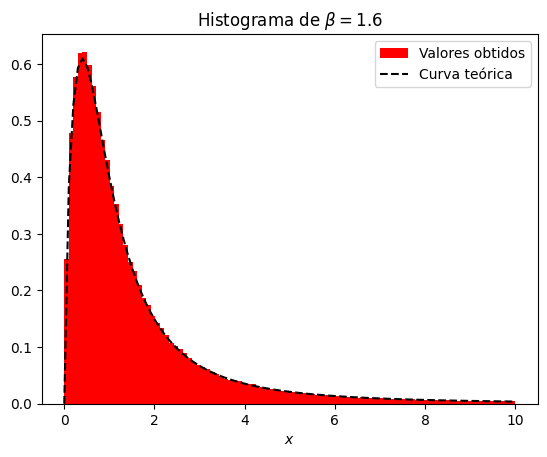

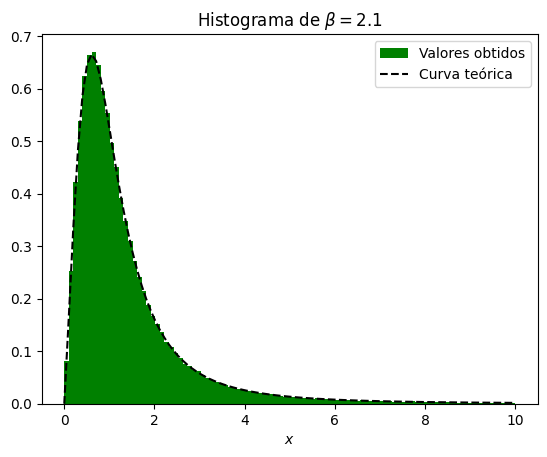

In [ ]:
C = 500000
rs = rd.random(C)
α = 1
βs = np.array([1,1.6,2.1])
results = np.zeros((3,C))
for i in range(3):
    results[i,:] = α*(1/rs-1)**(-1/βs[i])

plt.hist(results[0,:],bins=100)
plt.title('Histograma de $β=1$')
plt.xlabel('$x$')
plt.show()

#Obtemos um resultado pouco promissor porque a maioria dos valores gerados são proximos de 0. No entanto, alguns valores são
#muito grandes (na ordem das centenas de milhar) e como o plt.hist divide os bins usando o valor máximo e o valor mínimo não
#é possivel perceber o comportamento do histograma.

def ρ_x(x, α, β):
  return β/α * ((x/α)**(β-1)) / (1 + (x/α)**β)**2

a=0
b=10
M=100
x=np.linspace(0,10,100) #assim o histograma tem um espaçamento de bins q permite visualizar o seu comportamento

# β=1
plt.hist(results[0,:],bins=x, color='blue',density=True, label='Valores obtidos')   # Density=True normaliza o resultado
plt.plot(x, ρ_x(x, α, βs[0]),'k--', label='Curva teórica') #Curva teórica
plt.title('Histograma de $β=1$')
plt.xlabel('$x$')
plt.legend()
plt.show();
# β=1.6
plt.hist(results[1,:],bins=x, color='red',density=True, label='Valores obtidos')   # Density=True normaliza o resultado
plt.plot(x, ρ_x(x, α, βs[1]),'k--', label='Curva teórica') #Curva teórica
plt.title('Histograma de $β=1.6$')
plt.xlabel('$x$');
plt.legend()
plt.show();
# β=2.1
plt.hist(results[2,:],bins=x, color='green',density=True, label='Valores obtidos')   # Density=True normaliza o resultado
plt.plot(x, ρ_x(x, α, βs[2]),'k--', label='Curva teórica') #Curva teórica
plt.title('Histograma de $β=2.1$')
plt.xlabel('$x$')
plt.legend()
plt.show();

3. Podemos tentar estimar o valor médio a partir do cálculo do estimador
da média,
\begin{equation}
\overline{X}_{N}=\frac{1}{N}\sum_{i=1}^{N}x_{i}.
\end{equation}\end{equation}
para uma amostra finita, o estimador é ele próprio uma variável aleatória
pelo que tem uma distribuição de probabilidade. Considerando experiências
nas quais que gera $N$ eventos e para cada uma calcula o estimador
do valor médio, obtenha, um histograma de frequências para cada uma
destas experiências, considerando,

$\qquad$ a) $\beta=1$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

Responda Aqui

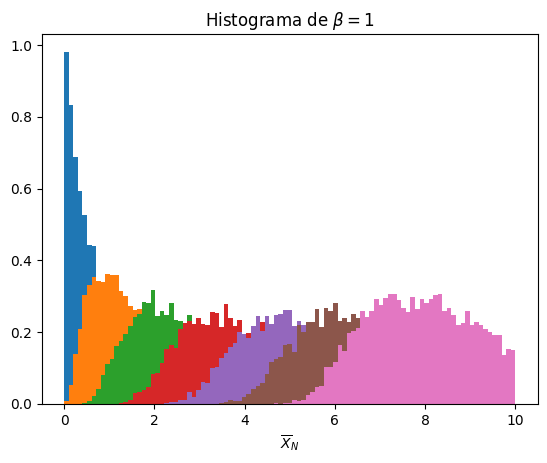

In [ ]:
title = np.array([1,1.6,2.1])

def X_N(M, N, α, β):   # Função que retorna os valores de X_N
  results = np.zeros(M)   # Array que guarda os valores de X_N
  for i in range(M):  # Ciclo que calcula a média para cada x
    rs = rd.random(N)
    results[i] = np.average(α*(1/rs-1)**(-1/β))
  return results

M=10000
N=np.array([1, 4, 16, 64, 256, 1024, 4096])
#β=1
for i in range(len(N)):
  plt.hist(X_N(M, N[i], 1, βs[0]), bins=x, density=True)
plt.title('Histograma de $β=1$')
plt.xlabel('$\overline{X}_N$')
plt.show();

$\qquad$ b) $\beta=1.6$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

Responda Aqui

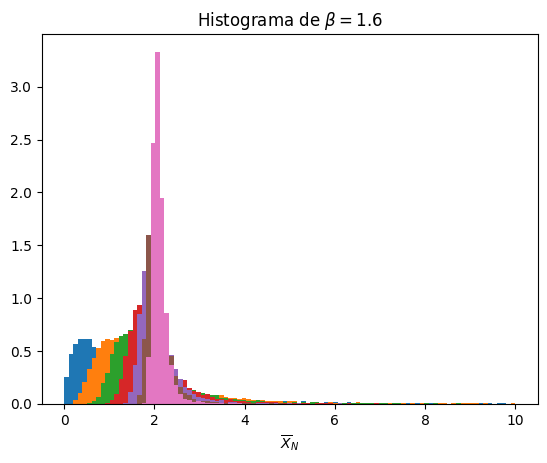

In [ ]:
#β=1.6
for i in range(len(N)):
  plt.hist(X_N(M, N[i], 1, βs[1]), bins=x, density=True)
plt.title('Histograma de $β=1.6$')
plt.xlabel('$\overline{X}_N$')
plt.show();

$\qquad$ c) $\beta=2.1$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

Responda Aqui

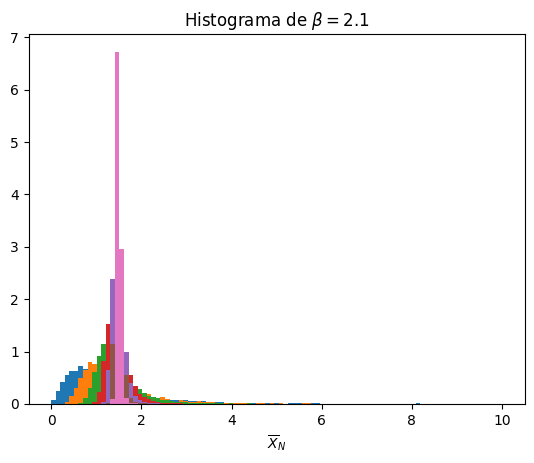

In [ ]:
#β=2.1
for i in range(len(N)):
  plt.hist(X_N(M, N[i], 1, βs[2]), bins=x, density=True)
plt.title('Histograma de $β=2.1$')
plt.xlabel('$\overline{X}_N$')
plt.show();

4. O que conclui da observações que fez? Em quais das situações é possível determinar um valor médio? Porquê?

Para $\beta=1$ obtemos um gráfico com bastante espalhamento comparativamente aos outros gráficos. À medida que se aumenta o $\beta$ verificamos um menor espalhamento. Para $\beta=2.1$ podemos calcular uma média, o mesmo não se aplica aos outros gráficos.

In [ ]:
# Responda Aqui

5. Considerando o caso em que $\beta=2.1$, represente como função de $N$
o desvio padrão da amostra de medidas de $\overline{X}_{N}$. Qual
o significado deste comportamento para a medição de um valor médio?

Responda Aqui

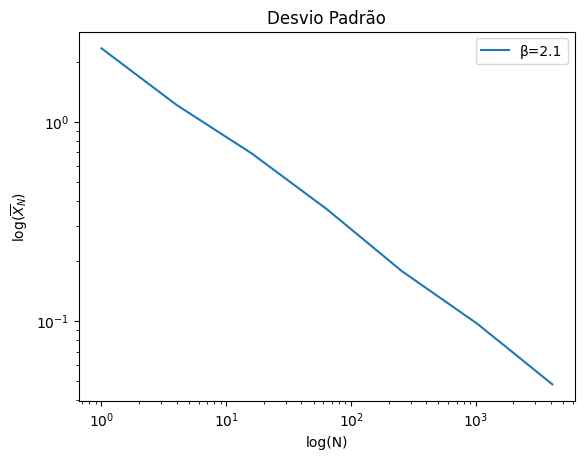

In [ ]:
βs=np.array([1.6,2.1])
M=100000 #quanto maior este valor mais proximo o resultado fica de uma reta
Ns=np.array([1, 4, 16, 64, 256, 1024, 4096])
array = np.zeros([len(Ns),len(βs)])

#β=2.1
for i in range(len(Ns)):
  array[i,1]=np.std(X_N(M, Ns[i], 1, βs[1])); #caculo do desvio padrão
plt.plot(Ns,array[:,1],label='β=2.1')
plt.xscale('log')
plt.yscale('log')

#titulo/legenda
plt.legend()
plt.title('Desvio Padrão')
plt.xlabel('log(N)')
plt.ylabel('log($\overline{X}_N$)');

6. Repita a análise anterior para $\beta=1.6$. O que conclui neste caso? Será possível medir um valor médio? Como compatibiliza com o resultado anterior? Afinal é possível ou não medir este valor médio? Será que uma análise de percentis é útil?

A análise de percentis é útil para verificar outliers.

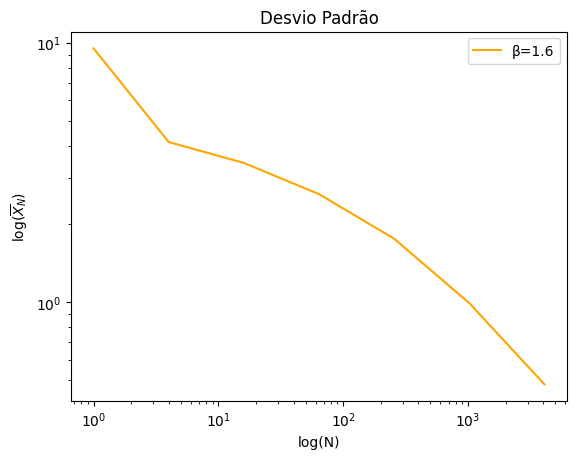

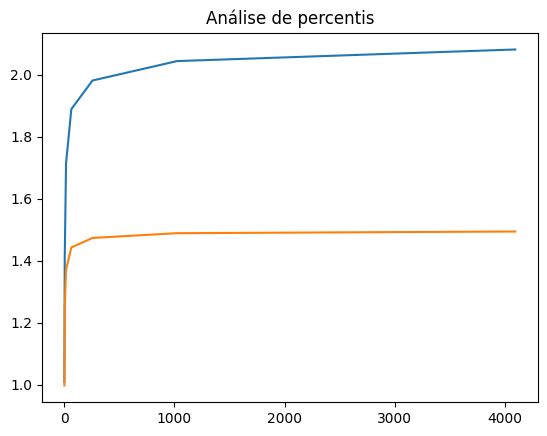

In [ ]:
βs=np.array([1.6,2.1])
M=100000 #quanto maior este valor mais proximo o resultado fica de uma reta
Ns=np.array([1, 4, 16, 64, 256, 1024, 4096])
array = np.zeros([len(Ns),len(βs)])

#β=1.6
for i in range(len(Ns)):
  array[i,0]=np.std(X_N(M, Ns[i], 1, βs[0])); #caculo do desvio padrão
plt.plot(Ns,array[:,0],label='β=1.6', color = 'orange')
plt.xscale('log')
plt.yscale('log')

#titulo/legenda
plt.legend()
plt.title('Desvio Padrão')
plt.xlabel('log(N)')
plt.ylabel('log($\overline{X}_N$)')
plt.show();

#analise de percentis
def X_N(M, N, α, β):
  results = np.zeros(M)
  for i in range(M):
    rs = rd.random(N)
    results[i] = np.average(α*(1/rs-1)**(-1/β))
  return results

βs=np.array([1.6,2.1])
M=10000
Ns=np.array([1, 4, 16, 64, 256, 1024, 4096])
array = np.zeros([len(N),len(βs)])

for j in range(len(βs)):
  for i in range(len(Ns)):
    array[i,j]=np.percentile(X_N(M, Ns[i], 1, βs[j]), 50);

plt.plot(N,array)
plt.title('Análise de percentis')
plt.xlabel('')
plt.ylabel('');

## Pergunta 2

**Amostragem por importância:** A função característica da distribuição
de probabilidade da média de $N$ variáveis é dada por,
\begin{equation}
\phi(k,N)=\left(\int_{0}^{+\infty}dx\rho(x)e^{-i\frac{k}{N}x}\right)^{N}=\phi^{N}\left(\frac{k}{N},1\right),
\end{equation}
Para estimar o integral é possível calcular usar o método de amostragem
por importância para cada valor de $k$. Considerando $\beta=1.6$
e $\beta=2.1$:

1. Calcule como função de $k$ o integral da função característica de
$\rho(x)$ e estime a barra de erro usando $128$ medidas. Represente
os pontos com as respectivas barras de erro.

Responda Aqui

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


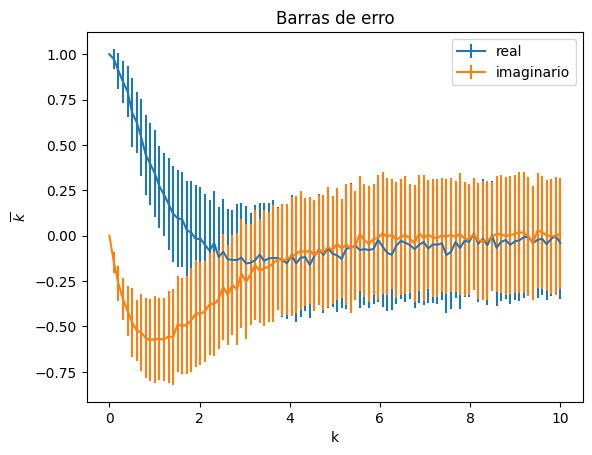

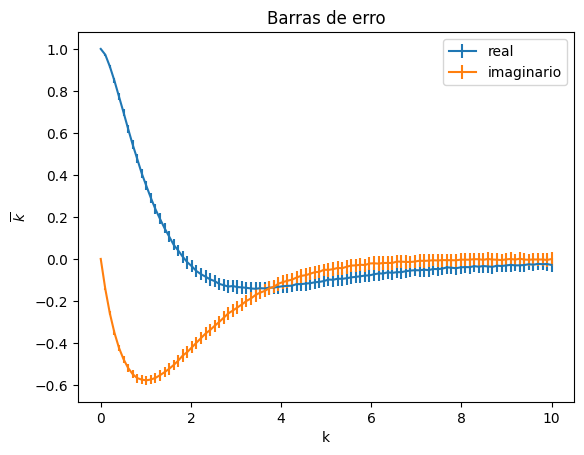

In [ ]:
def random_sample(α,β,C):
  rs = rd.random(C)
  results = α*(1/rs-1)**(-1/β)
  return results

def integral(C,k,α,β,m):
  M = np.zeros(m,dtype=complex)
  for i in range(m):
    data = random_sample(α,β,C)
    data = np.exp(-1j*k*data)
    M[i] = np.mean(data)
  return M

integral_value = integral(1000,1,1,2,128)
mean = np.mean(integral_value)
std = np.std(integral_value)

mean,std

ks = np.linspace(0,10,100)
mean_ks = np.zeros(len(ks),dtype=complex)
std_ks = np.zeros(len(ks),dtype=complex)

for i in range(len(ks)):
  integral_value = integral(10,ks[i],1,2,128)
  mean_ks[i] = np.mean(integral_value)
  std_ks[i] = np.std(integral_value)

plt.errorbar(ks,mean_ks.real,yerr=std_ks,label='real')
plt.errorbar(ks,mean_ks.imag,yerr=std_ks,label='imaginario')
plt.legend()
#titulo/legenda###############
plt.legend()
plt.title('Barras de erro')
plt.xlabel('k')
plt.ylabel('$\overline{k}$')
plt.show();
##############################
ks = np.linspace(0,10,100)
mean_ks = np.zeros(len(ks),dtype=complex)
std_ks = np.zeros(len(ks),dtype=complex)

for i in range(len(ks)):
  integral_value = integral(1000,ks[i],1,2,128) #quantos mais valores usarmos mais pequenas ficam as barras de erro
  mean_ks[i] = np.mean(integral_value)
  std_ks[i] = np.std(integral_value)

plt.errorbar(ks,mean_ks.real,yerr=std_ks,label='real')
plt.errorbar(ks,mean_ks.imag,yerr=std_ks,label='imaginario')
plt.legend()
#titulo/legenda################
plt.legend()
plt.title('Barras de erro')
plt.xlabel('k')
plt.ylabel('$\overline{k}$')
plt.show();
################################

2. Sendo $\phi(k)$ uma função complexa, $\phi(k,N)$ também será. Considerando
que escreve $\phi=re^{i\Theta}$, ou seja, à custa de uma parte real
e uma fase,
\begin{equation}
\phi(k,N)=r^{N}\left(\frac{k}{N}\right)e^{iN\Theta(k/N)},
\end{equation}
represente $R(k,N)=r^{N}\left(k/N\right)$ e $N\Theta(k/N)$ como
função de $k$ para diferentes valores de $N$. O que observa?

Responda Aqui

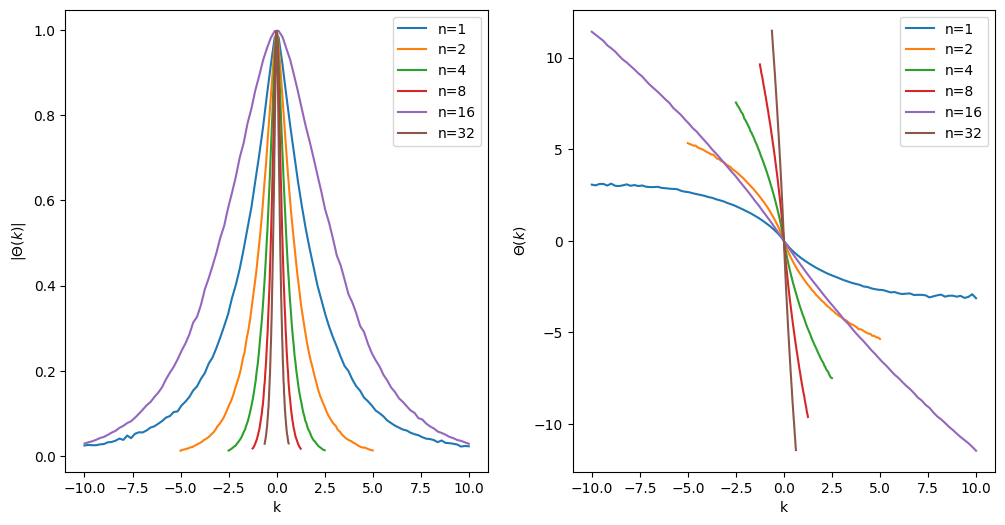

In [ ]:
def phi_k(ks):
  mean_ks = np.zeros(len(ks),dtype=complex)

  for i in range(len(ks)):
    integral_value = integral(1000,ks[i],1,2,128)
    mean_ks[i] = np.mean(integral_value)

  return mean_ks

ns = np.array([1,2,4,8,16,32])
ks = np.linspace(-10,10,100)
fig,ax = plt.subplots(ncols = 2,figsize=(12,6))

a = phi_k(ks/ns[0])
a_modulo = np.abs(a)
a_angulo = np.angle(a)
ax[0].plot(ks/ns[0],a_modulo**ns[0],label='n=1') #em funçao de k e cada n é uma linha diferente
ax[1].plot(ks/ns[0],a_angulo*ns[0],label='n=1') #picos equivale aos valores em π e -π em q os valores sao iguais

a = phi_k(ks/ns[1])
a_modulo = np.abs(a)
a_angulo = np.angle(a)
ax[0].plot(ks/ns[1],a_modulo**ns[1],label='n=2')
ax[1].plot(ks/ns[1],a_angulo*ns[1],label='n=2')

a = phi_k(ks/ns[2])
a_modulo = np.abs(a)
a_angulo = np.angle(a)
ax[0].plot(ks/ns[2],a_modulo**ns[2],label='n=4')
ax[1].plot(ks/ns[2],a_angulo*ns[2],label='n=4')

a = phi_k(ks/ns[3])
a_modulo = np.abs(a)
a_angulo = np.angle(a)
ax[0].plot(ks/ns[3],a_modulo**ns[3],label='n=8')
ax[1].plot(ks/ns[3],a_angulo*ns[3],label='n=8')

a = phi_k(ks/ns[4])
a_modulo = np.abs(a)
a_angulo = np.angle(a)
ax[0].plot(ks,a_modulo**ns[4],label='n=16')
ax[1].plot(ks,a_angulo*ns[4],label='n=16')

a = phi_k(ks/ns[4])
a_modulo = np.abs(a)
a_angulo = np.angle(a)

ax[0].plot(ks/ns[4],a_modulo**ns[4],label='n=32')
ax[1].plot(ks/ns[4],a_angulo*ns[4],label='n=32')


ax[0].legend()
ax[0].set_title(r'')
ax[0].set_xlabel('k/n')
ax[0].set_ylabel(r'$|\Theta(k)|$')
ax[1].legend()
ax[1].set_title(r'')
ax[1].set_xlabel('k/n')
ax[1].set_ylabel(r'$\Theta(k)$');

3.  A demonstração mais frequente do teorema do limite central é feita através de uma expansão em cumulantes. Contudo nem sempre esta expansão é possível ser feita uma vez que os cumulantes podem ser divergentes. Uma possibilidade é estudar o escalamento da distribuição característica com o tamanho do sistema. Explique como é que com o escalamento destas funções pode caracterizar a distribuição da média $\overline{X}_{N}$?

Sugestões:

• Se o valor médio estiver definido deve existir uma transformação de coordenadas $\overline{X}_{N}=\langle x\rangle+N^{\gamma}y$, tal que $\rho(y)$ deverá ser independente de $N$ para $N$ grande.

• Para caracterizar o escalamento de $R(k,N)$ pode encontrar o expoente $\beta$ tal que $R(k'N^{\beta},N)=f(k')$.

Responda Aqui

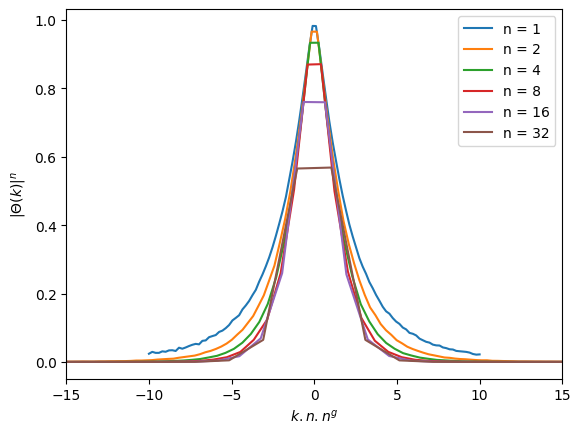

In [ ]:
g=-0.33

for i in range(len(ns)):
  a = phi_k(ks)
  a_modulo = np.abs(a)
  plt.plot(ks*ns[i]*ns[i]**g,a_modulo**ns[i],label='n = ' + str(ns[i]))

plt.legend()
plt.title('')
plt.xlabel(r'$k.n.n^g$')
plt.ylabel('$|\Theta(k)|^n$')
plt.xlim(-15,15)
plt.show();

### Bom Trabalho!